[지역별 범죄율 예측]
- 사람이 많이 사는 서울 경기 지역이 범죄율이 높을것이다.

In [1]:
import pandas as pd         # 데이터 분석 및 전처리용 모듈
import numpy as np          # 배열(array)를 지원하는 파이썬 패키지
import matplotlib.pyplot as plt
import seaborn as sns           #데이터 시각화 즉, 그래프 관련 모듈
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')

In [2]:
!pip install folium

In [3]:
# 무료 지도
import folium  #folium 홈페이지 참고

In [4]:
# 데이터 불러오기
Data = '../지역별 범죄.xlsx'   # 100,000명 기준

In [5]:
criminal_data = pd.read_excel(Data)

In [6]:
criminal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      19 non-null     object
 1   2014    19 non-null     object
 2   2015    17 non-null     object
 3   2016    17 non-null     object
 4   2017    17 non-null     object
 5   2018    17 non-null     object
 6   2019    17 non-null     object
 7   2020    17 non-null     object
 8   2021    17 non-null     object
 9   2022    17 non-null     object
dtypes: object(10)
memory usage: 1.6+ KB


In [7]:
criminal_data.head()

,년도,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,서울,"3,903.2","3,887.8","3,786.9","3,609.0","3,519.4","3,525.9","3,309.7","2,892.5","3,139.8"
1,부산,"4,285.4","4,532.5","4,178.7","3,800.6","3,709.2","3,807.1","3,804.7","3,412.9","3,580.4"
2,대구,"4,180.7","4,363.7","3,807.5","3,347.8","3,246.0","3,402.2","3,279.8","3,029.7","3,020.5"
3,인천,"3,628.7","3,823.6","3,769.0","3,472.3","3,222.4","3,431.0","3,264.6","2,904.9","3,079.8"
4,광주,"4,731.0","4,458.2","4,017.8","3,653.0","3,441.4","3,547.5","3,370.6","3,036.9","2,935.8"


In [8]:
criminalDF = criminal_data.dropna()

In [9]:
print(criminalDF)

    년도     2014     2015     2016     2017     2018     2019     2020  \
0   서울  3,903.2  3,887.8  3,786.9  3,609.0  3,519.4  3,525.9  3,309.7   
1   부산  4,285.4  4,532.5  4,178.7  3,800.6  3,709.2  3,807.1  3,804.7   
2   대구  4,180.7  4,363.7  3,807.5  3,347.8  3,246.0  3,402.2  3,279.8   
3   인천  3,628.7  3,823.6  3,769.0  3,472.3  3,222.4  3,431.0  3,264.6   
4   광주  4,731.0  4,458.2  4,017.8  3,653.0  3,441.4  3,547.5  3,370.6   
5   대전  3,235.2  3,383.9  3,365.3  3,296.1  3,184.2  3,188.4  3,147.7   
6   울산  3,951.6  2,940.0  2,539.9  2,291.9  2,196.8  2,253.0  2,187.0   
7   세종  2,806.6  2,081.7  2,031.5  1,891.8  1,763.8  1,912.4  1,909.5   
8   경기  3,606.1  3,806.9  4,151.3  3,596.9  3,300.6  3,273.8  3,192.6   
9   강원  3,891.7  4,170.0  4,260.0  3,872.8  3,450.3  3,505.6  3,392.6   
10  충북  3,512.2  3,667.6  3,857.7  3,539.0  3,316.2  3,302.2  3,166.8   
11  충남  3,697.4  3,899.9  3,674.6  3,425.9  3,463.5  3,372.0  3,300.8   
12  전북  3,427.0  3,579.4  3,400.4  3,130.3  3,091.8

In [10]:
criminalDF.describe()

,년도,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,17,17,17,17,17,17,17,17,17,17
unique,17,17,17,17,17,17,17,17,17,17
top,서울,"3,903.2","3,887.8","3,786.9","3,609.0","3,519.4","3,525.9","3,309.7","2,892.5","3,139.8"
freq,1,1,1,1,1,1,1,1,1,1


In [11]:
criminalDF.columns

Index(['년도', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')

In [12]:
criminalDF.shape

(17, 10)

In [13]:
criminalDF.columns = ['지역'] + criminalDF.columns[1:].astype(str).tolist()

In [14]:
criminalDF_2022 = criminalDF[['지역', '2022']].copy()
criminalDF_2022['2022'] = criminalDF_2022['2022'].astype(str).str.replace(',', '').astype(float)

In [15]:
print(criminalDF_2022)

    지역    2022
0   서울  3139.8
1   부산  3580.4
2   대구  3020.5
3   인천  3079.8
4   광주  2935.8
5   대전  3102.1
6   울산  1597.4
7   세종  1804.5
8   경기  2858.9
9   강원  3017.1
10  충북  2896.8
11  충남  3111.3
12  전북  3018.5
13  전남  3479.8
14  경북  3004.0
15  경남  3389.4
16  제주  4066.6


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13428\236641980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=criminalDF_2022, x='지역', y='2022', palette='coolwarm')


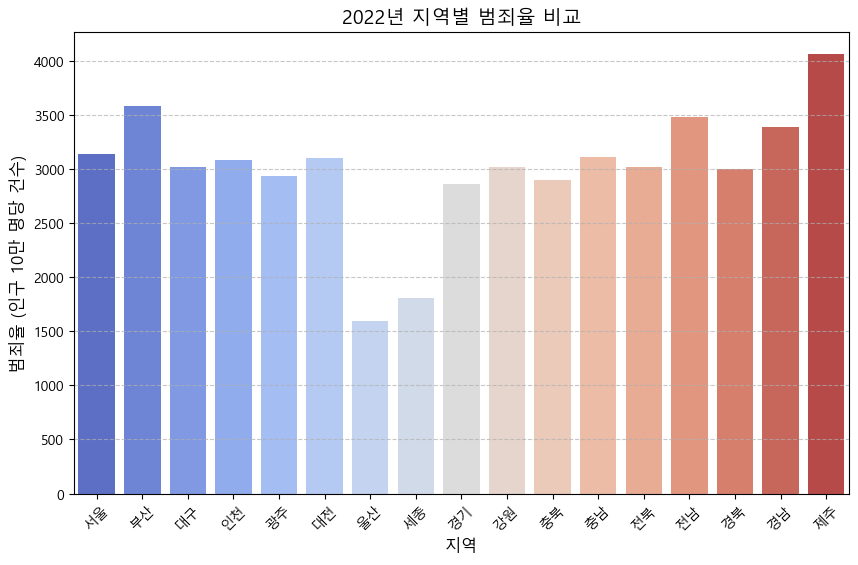

In [16]:
# 그래프 스타일 설정
plt.figure(figsize=(10, 6))
sns.barplot(data=criminalDF_2022, x='지역', y='2022', palette='coolwarm')

# 그래프 제목 및 축 라벨 설정
plt.title("2022년 지역별 범죄율 비교", fontsize=14)
plt.xlabel("지역", fontsize=12)
plt.ylabel("범죄율 (인구 10만 명당 건수)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 표시
plt.show()

In [17]:
# 2014년~2022년 데이터만 선택
criminalDF_long = criminalDF.melt(id_vars=['지역'], var_name='년도', value_name='범죄율')

In [18]:
criminalDF_long['범죄율'] = criminalDF_long['범죄율'].astype(str).str.replace(',', '').astype(float)

In [19]:
print(criminalDF_long.head())

   지역    년도     범죄율
0  서울  2014  3903.2
1  부산  2014  4285.4
2  대구  2014  4180.7
3  인천  2014  3628.7
4  광주  2014  4731.0


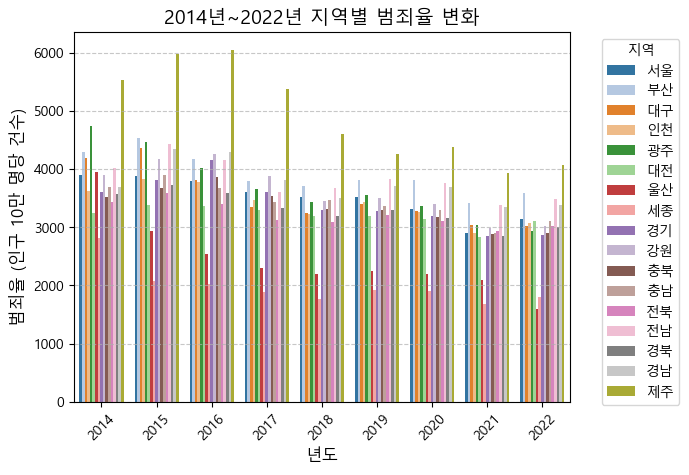

In [20]:
# 막대 그래프 그리기
sns.barplot(data=criminalDF_long, x='년도', y='범죄율', hue='지역', palette='tab20')
figsize = (30,6)
# 그래프 제목 및 축 라벨 설정
plt.title("2014년~2022년 지역별 범죄율 변화", fontsize=14)
plt.xlabel("년도", fontsize=12)
plt.ylabel("범죄율 (인구 10만 명당 건수)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="지역", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [21]:
!pip install plotly
import plotly.express as px
!pip install -U nbformat

In [22]:
criminalDF_long = criminalDF_long.groupby(['지역','년도'])['범죄율'].mean().reset_index()


In [23]:
fig= px.bar(data_frame=criminalDF_long, x='지역', y='범죄율', animation_frame='년도', title = "[지역별 년도별 범죄율]",color='범죄율',color_continuous_scale= 'greens')
# plotly 홈페이지 참고

In [24]:
fig

In [25]:
!pip install -U kaleido

In [26]:
# 남한 중심부 주소
south_korea_center = [35.9, 127.7]

In [27]:
# 지도 생성
m = folium.Map(location=south_korea_center, zoom_start=7)

In [28]:
# 시청기준
regions = [
    (37.5, 126.9, "2014-2022 서울특별시청 범죄율:31,574.2"),
    (35.1, 129.0, "2014-2022 부산광역시청 범죄율:35,111.5"),
    (35.8, 128.6, "2014-2022 대구광역시청 범죄율:31,677.9"),
    (37.4, 126.7, "2014-2022 인천광역시청 범죄율:30,596.3"),
    (35.1, 126.8, "2014-2022 광주광역시청 범죄율:33,192.2"),
    (36.3, 127.3, "2014-2022 대전광역시청 범죄율:28,737.6" ),
    (35.5, 129.3, "2014-2022 울산광역시청 범죄율:22,045.7"),
    (36.4, 127.2, "2014-2022 세종특별자치시청 범죄율:17,880.6"),
    (37.2, 127.0, "2014-2022 경기도청 범죄율:30,637.6"),
    (37.8, 127.7, "2014-2022 강원특별자치도청 범죄율:32,545.9"),
    (36.6, 127.4, "2014-2022 충청북도청 범죄율: 30,439"),
    (36.6, 126.6, "2014-2022 충청남도청 범죄율: 31,753.2"),
    (35.7, 127.1, "2014-2022 전라북도청 범죄율: 28,898.9"),
    (34.8, 126.4, "2014-2022 전라남도청 범죄율: 34,315.1"),
    (36.5, 128.5, "2014-2022 경상북도청 범죄율: 29,720.2"),
    (35.2, 128.6, "2014-2022 경상남도청 범죄율: 33,777.6"),
    (33.4, 126.5, "2014-2022 제주특별자치도청 범죄율: 44,188.8")                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
]


In [29]:
# 각 도시에 마커 추가
for lat, lon, name in regions:
    folium.Marker(
        location=[lat, lon],
        popup=name,  # 클릭 시 도시명 표시
        tooltip=name,  # 마우스 오버 시 도시명 표시
        icon=folium.Icon(color="green", icon="info-sign")
    ).add_to(m)


In [30]:
m

[결론]
- 인구수에 비해 범죄율이 높은건 아니다.
- 제주특별시는 관광지라 관광객들이 인구에 포함이 되지않아 수치가 높게 나온다.
